# Accident Data
### Analyst: Ryann Kim Sesgundo

# Accident Data
### Analyst: Ryann Kim Sesgundo

#### Import dependencies

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("datasets/accident_data.csv")

In [3]:
data.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [4]:
data.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [5]:
data['Latitude'] = data['Latitude'].astype('category')
data['Longitude'] = data['Longitude'].astype('category')

data['Latitude'] = data['Latitude'].fillna(data['Latitude'].mode()[0])
data['Longitude'] = data['Longitude'].fillna(data['Longitude'].mode()[0])
data['Road_Surface_Conditions'] = data['Road_Surface_Conditions'].fillna(data['Road_Surface_Conditions'].mode()[0])
data['Urban_or_Rural_Area'] = data['Urban_or_Rural_Area'].fillna(data['Urban_or_Rural_Area'].mode()[0])
data['Road_Type'] = data['Road_Type'].fillna('Unknown Road Type')
data['Weather_Conditions'] = data['Weather_Conditions'].fillna('Unknown Weather Conditions')

In [6]:
# If ever, convert first to string then convert back to Date Time
data['Accident Date'] = data['Accident Date'].astype("str")
data['Accident Date'] = data['Accident Date'].str.strip()
data['Accident Date'] = data['Accident Date'].str.replace('/', '-')

In [7]:
data['Accident Date'] = pd.to_datetime(data['Accident Date'], dayfirst=True, errors='coerce')

In [8]:
data['Accident_Severity'] = data['Accident_Severity'].astype('category')
data['Light_Conditions'] = data['Light_Conditions'].astype('category')
data['District Area'] = data['District Area'].astype('category')
data['Road_Surface_Conditions'] = data['Road_Surface_Conditions'].astype('category')
data['Road_Type'] = data['Road_Type'].astype('category')
data['Urban_or_Rural_Area'] = data['Urban_or_Rural_Area'].astype('category')
data['Weather_Conditions'] = data['Weather_Conditions'].astype('category')
data['Vehicle_Type'] = data['Vehicle_Type'].astype('category')


In [9]:
data.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

In [10]:
data.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

### Adding more fields

In [11]:
data['Year'] = data['Accident Date'].dt.year
data['Month'] = data['Accident Date'].dt.month
data['DayOfWeek'] = data['Accident Date'].dt.dayofweek


data['Month'] = data['Month'].astype('category')
data['DayOfWeek'] = data['DayOfWeek'].astype('category')
data['Year'] = data['Year'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  category      
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  category      
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

# Analyzation Starts here

In [12]:
# TODO: Create a percentage function
def percent(value, total = 0):
    if total == 0:
        total = data.value_counts().sum()
    return f"{np.round(((value / total) * 100), 2)}%"

months = [ "",
    "January", "Febuary", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

months_dict = {
    0: "January", 1: "Febuary", 2: "March", 3: "April", 4: "May", 5:"June",
    6: "July", 7: "August", 8: "September", 9: "October", 10: "November", 11: "December"
}


days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

days_dict = {
    0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"
}

### 1. Common Weather Conditions

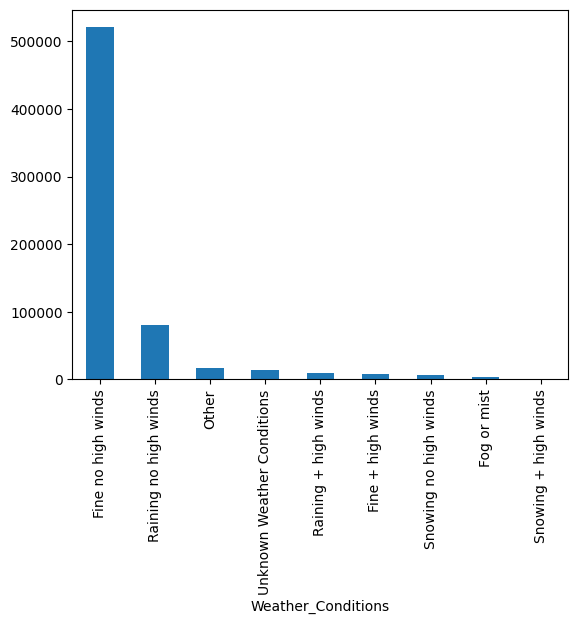

Weather_Conditions
Fine no high winds            520885
Raining no high winds          79696
Other                          17150
Unknown Weather Conditions     14128
Raining + high winds            9615
Fine + high winds               8554
Snowing no high winds           6238
Fog or mist                     3528
Snowing + high winds             885
Name: count, dtype: int64

In [13]:
weather_condition = data['Weather_Conditions'].value_counts()

weather_condition.plot(kind='bar')
plt.show()

weather_condition

In [14]:
weather = data[data['Weather_Conditions'] == data['Weather_Conditions'].mode()[0]].value_counts().sum()
weather

np.int64(520885)

In [15]:
percent(value=weather)

'78.84%'

### The highest accident rate with the weather condition is `Fine no high winds` with `660679` or `78.84%` of the entire record records.

### 2. Common Vehicle

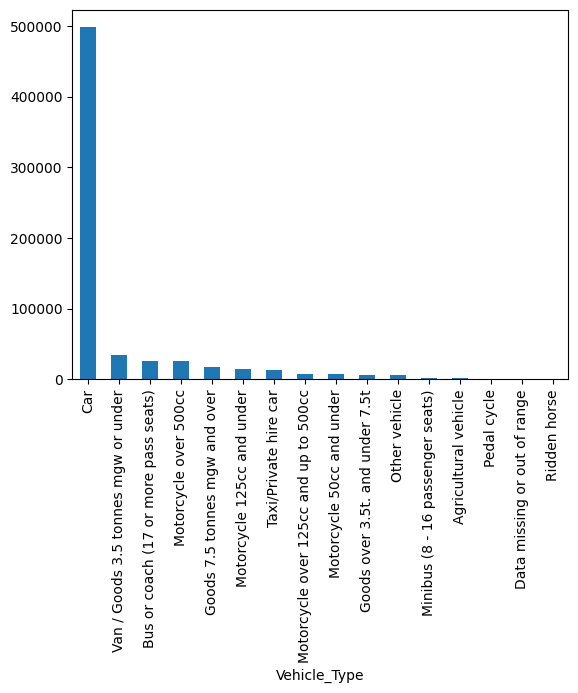

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

In [16]:
vehicle_type = data['Vehicle_Type'].value_counts()

vehicle_type.plot(kind="bar")
plt.show()

vehicle_type

In [17]:
vehicle_count = data[data['Vehicle_Type'] == data['Vehicle_Type'].mode()[0]].value_counts().sum()
vehicle_count

np.int64(497992)

In [18]:
percent(vehicle_count)

'75.38%'

### The highest Vehicle type involved in accident recorded is `Car` with the count of `497992` or `75.38%` of the entire record.


### 3. Is there's a relationship of Weather Conditions and Vehicle Type in count of accident


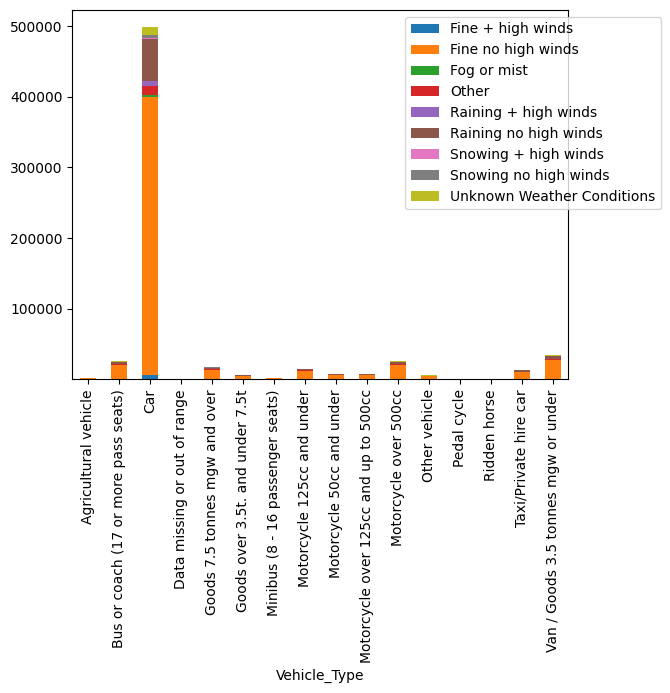

Weather_Conditions,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds,Unknown Weather Conditions
Vehicle_Type,,,,,,,,,
Agricultural vehicle,20,1513,9,57,37,244,3,22,42
Bus or coach (17 or more pass seats),350,20398,134,609,389,3182,32,219,565
Car,6463,392668,2641,12993,7206,59940,677,4748,10656
Data missing or out of range,1,4,0,0,0,0,0,0,1
Goods 7.5 tonnes mgw and over,251,13589,93,459,275,2114,28,149,349
Goods over 3.5t. and under 7.5t,94,4823,31,151,83,729,6,52,127
Minibus (8 - 16 passenger seats),34,1552,14,50,27,245,2,16,36
Motorcycle 125cc and under,180,12064,82,388,220,1830,16,146,343
Motorcycle 50cc and under,106,6017,50,197,107,897,6,75,148


In [19]:

vehicle_ = data.groupby(['Vehicle_Type', 'Weather_Conditions']).size().unstack()

vehicle_.plot(kind="bar", stacked=True)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=10)
plt.show()
vehicle_

### 4. Area with highest accident rate
#### Rural or Urban

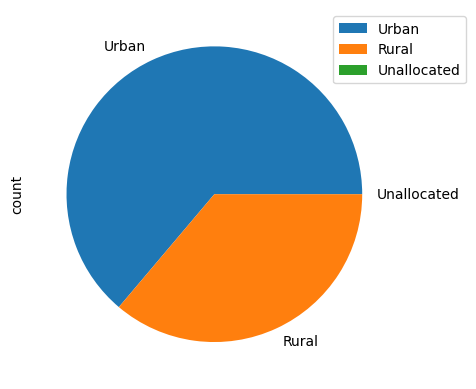

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

In [20]:
u_r = data['Urban_or_Rural_Area'].value_counts()

u_r.plot(kind="pie")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=10)
plt.show()

u_r

In [21]:
u_r_c = data[data['Urban_or_Rural_Area'] == data['Urban_or_Rural_Area'].mode()[0]].value_counts().sum()
u_r_c

np.int64(421678)

In [22]:
percent(u_r_c)

'63.82%'

### Most accident happened in `Urban Areas`, with data recorded `421678` or `63.82%` of the entire record.

### 5. Date with highest accident rate

In [23]:
accident_date = data['Accident Date'].mode()[0]
accident_date

Timestamp('2019-11-30 00:00:00')

### 6. Accident rate based on result from #5

In [24]:
### Using the earlier data, where it gives the data how many are the accidents recorded with this date
data[data['Accident Date'] == accident_date].value_counts().sum()

np.int64(704)

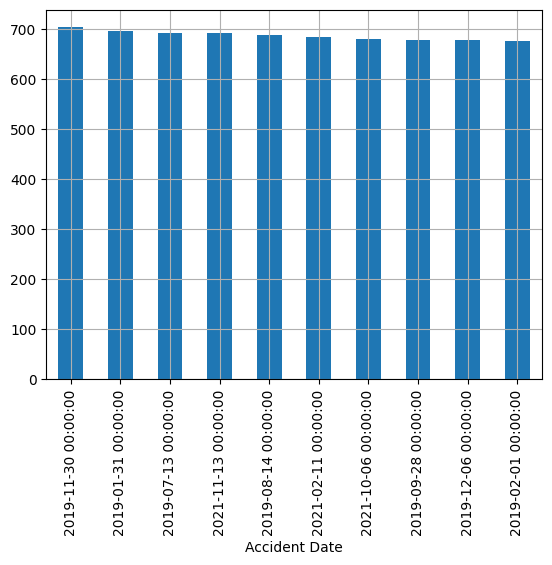

In [25]:
accident_date_ = data['Accident Date'].value_counts()[:10]

accident_date_.plot(kind="bar")
plt.grid()
plt.show()

### 7. Common District Area Involve (TOP 10)

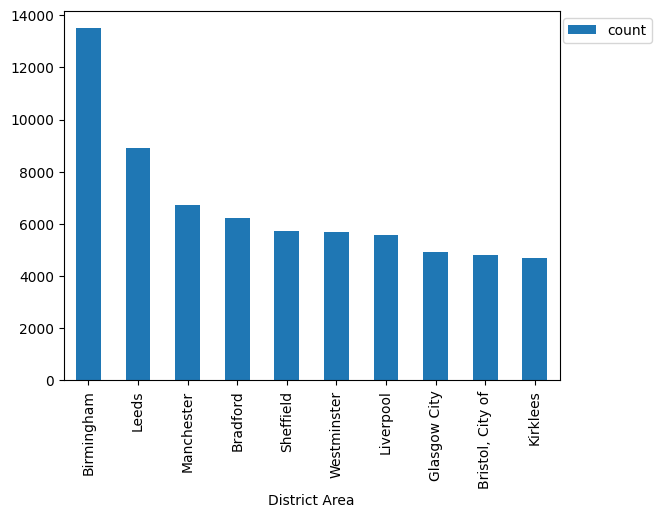

District Area
Birmingham          13491
Leeds                8898
Manchester           6720
Bradford             6212
Sheffield            5710
Westminster          5706
Liverpool            5587
Glasgow City         4942
Bristol, City of     4819
Kirklees             4690
Name: count, dtype: int64

In [26]:
district_data = data['District Area'].value_counts()

district_data.sort_values()
district_data = district_data[:10]
district_data.plot(kind="bar")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=10)
plt.show()

district_data

### 8. Common weather where the accidents in Common District Area Involve

In [27]:
weather_x_district = data[data['District Area'] == data['District Area'].mode()[0]]['Weather_Conditions'].mode()[0]
weather_x_district

'Fine no high winds'

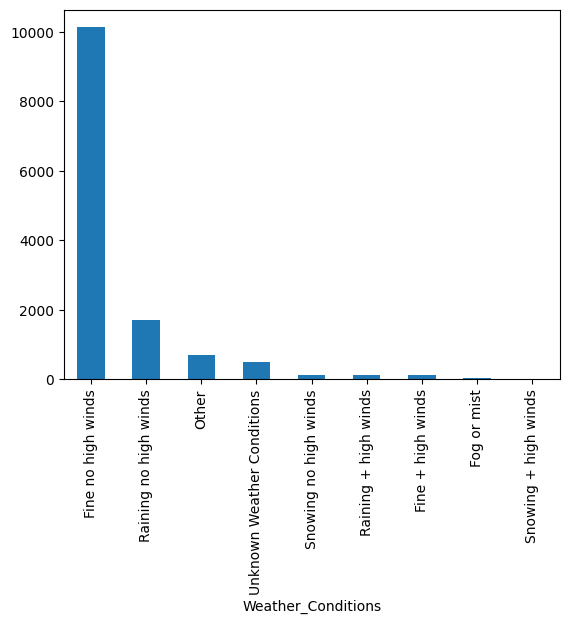

Weather_Conditions
Fine no high winds            10133
Raining no high winds          1717
Other                           713
Unknown Weather Conditions      505
Snowing no high winds           127
Raining + high winds            126
Fine + high winds               125
Fog or mist                      37
Snowing + high winds              8
Name: count, dtype: int64

In [28]:

wxd = data[data['District Area'] == 'Birmingham']
wxd = wxd['Weather_Conditions'].value_counts()

wxd.plot(kind="bar")
plt.show()
wxd

### 9. Most Common Vehicle Involve

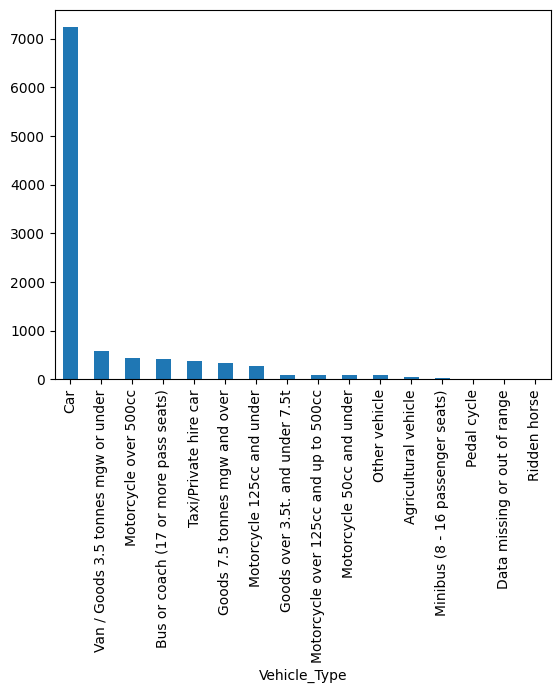

In [29]:
vehicles_x_weather_x_district = data[(data['District Area'] == data['District Area'].mode()[0]) & (data['Weather_Conditions'] == weather_x_district)]
vehicles_x_weather_x_district['Vehicle_Type'].mode()[0]

vehicles_x_weather_x_district['Vehicle_Type'].value_counts().plot(kind="bar")
plt.show()

### 10. Average Accident rate in Urban and Rural Area

In [30]:
rural_data = data[data['Urban_or_Rural_Area'] == 'Rural'].value_counts().sum()
rural_data

np.int64(238990)

In [31]:
urban_data = data[data['Urban_or_Rural_Area'] == 'Urban'].value_counts().sum()
urban_data

np.int64(421678)

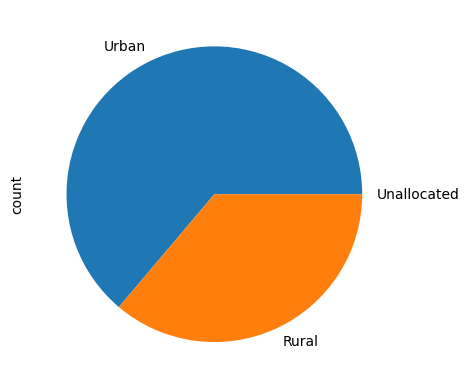

In [32]:
rulban = data['Urban_or_Rural_Area'].value_counts()
rulban.plot(kind="pie")
plt.show()

In [33]:
percent(rural_data)

'36.17%'

In [34]:
percent(urban_data)

'63.82%'

### There's more accident in `Urban areas` which has the count of `421678` or `63.82%` of the entire record rather than the `Rural areas` which as `238990` or `36.17` of the entire record.

### 11. Common Day of Week Accident

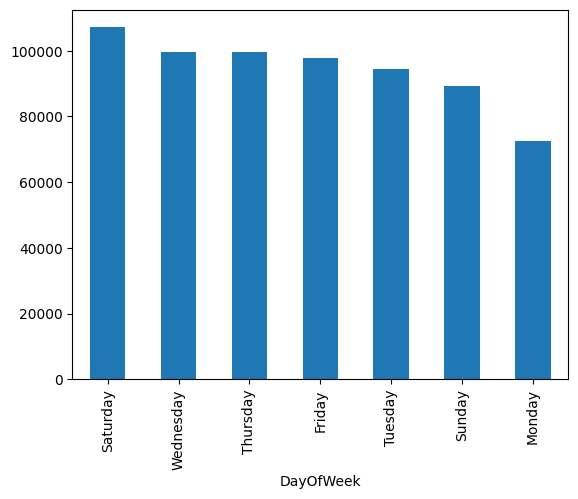

In [35]:
day = data['DayOfWeek'].mode()
days[day[0]]

datannn = data
datannn['DayOfWeek'] = datannn['DayOfWeek'].map(days_dict)
datannn['DayOfWeek'].value_counts().plot(kind="bar")
plt.show()

In [36]:
days = data['DayOfWeek']


### 12. Most common weather in every accident with each months

In [37]:
data.groupby(['Weather_Conditions', 'Month']).size().unstack()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Weather_Conditions,,,,,,,,,,,,
Fine + high winds,1816,694,1448,276,463,225,315,298,426,579,1388,626
Fine no high winds,35474,37671,43662,45844,47586,48292,46515,44213,47468,47822,40793,35545
Fog or mist,434,615,209,140,54,102,36,52,128,278,577,903
Other,2948,1996,952,553,634,553,713,664,663,1188,2173,4113
Raining + high winds,1990,501,1055,118,449,292,429,390,520,710,2217,944
Raining no high winds,7307,4964,5218,3596,6003,5828,8247,7245,6167,7615,11197,6309
Snowing + high winds,188,216,162,23,3,0,1,2,2,11,65,212
Snowing no high winds,1435,1746,288,168,14,16,15,11,13,67,563,1902
Unknown Weather Conditions,1280,1088,1092,1026,1146,1173,1174,1038,1068,1310,1451,1282


In [38]:
data__ = data

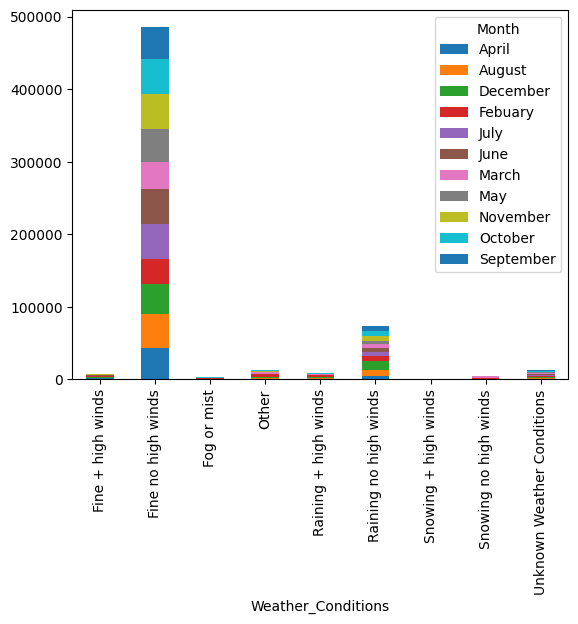

In [39]:
data__['Month'] = data__['Month'].map(months_dict)

__ = data__.groupby(['Weather_Conditions', 'Month']).size().unstack()
__.plot(kind="bar", stacked=True)
plt.show()

### 13. Year with Highest Accident Rate

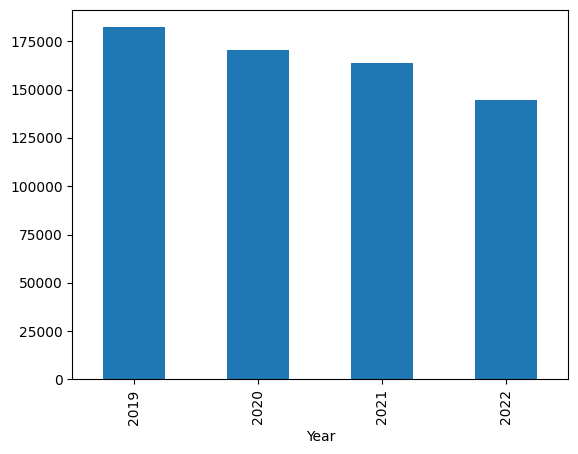

In [40]:
h_year = data['Year'].value_counts()
h_year.plot(kind="bar")
plt.show()

### 14. Month with Highest accident rate in Year 2020

In [41]:
month_2020 = data[data['Year'] == 2020]['Month']
month_2020.mode()[0]

'November'

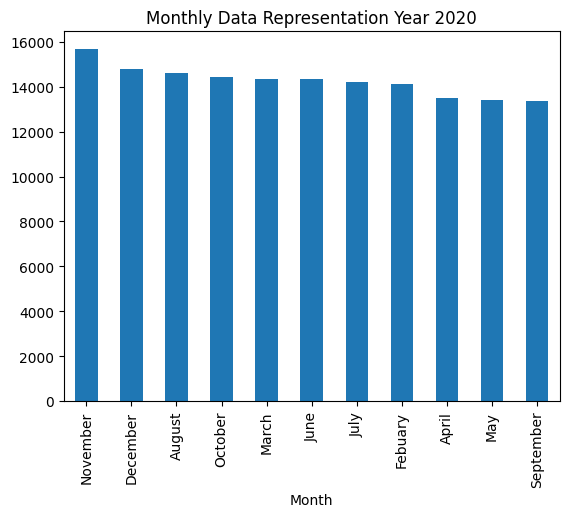

In [42]:
# Accident rate un year 2020

# _2020 = data.groupby(['Month', 'Year']).size().unstack().reset_index("Month")
# _2020['Month'] = _2020['Month'].astype("category")
# # _2020.plot(kind='line')
# # plt.plot(_2020.size().unstack(), marker="o")
# _2020['Month'] = _2020['Month'].map(months_dict)

# _2020.plot(kind="line", marker="o")
# # plt.xticks(ticks=_2020['Month'], labels=months)
# plt.legend(loc='upper right', fontsize=10)
# plt.xlabel("Months")
# plt.title("Monthly Data Representation")
# plt.gcf().set_size_inches(13, 5)
# plt.show()
# _2020['Month'].unique()
# _2020 # ['Month']

month_2020.value_counts().plot(kind="bar")
plt.title("Monthly Data Representation Year 2020")
plt.show()

### 15. Month with highest accident rate in Year 2021

In [43]:
month_2021 = data[data['Year'] == 2021]['Month']
month_2021.mode()[0]

'December'

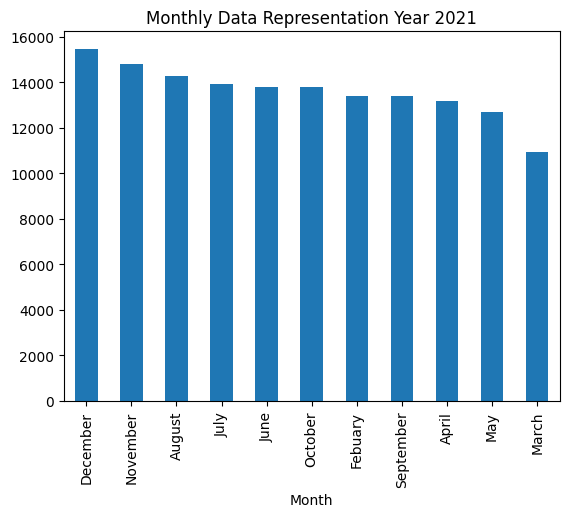

In [44]:
month_2021.value_counts().plot(kind="bar")
plt.title("Monthly Data Representation Year 2021")
plt.show()

### 16. Month with highest accident rate in year 2022

In [45]:
month_2022 = data[data['Year'] == 2022]['Month']
month_2022.mode()[0]

'December'

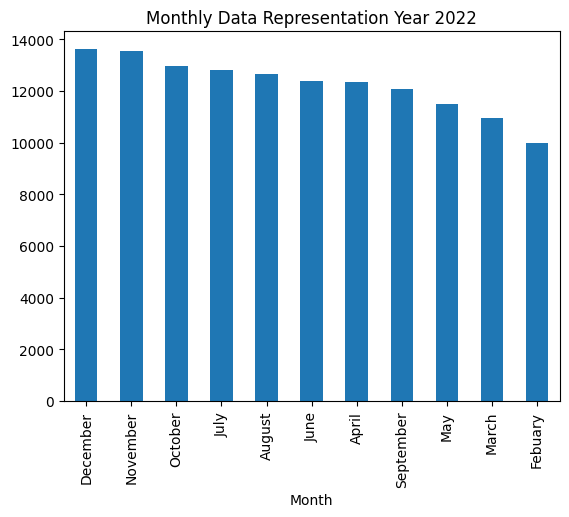

In [46]:
month_2022.value_counts().plot(kind="bar")
plt.title("Monthly Data Representation Year 2022")
plt.show()

### 17. Highest casualty in an accident

In [47]:
data['Number_of_Casualties'].value_counts()

Number_of_Casualties
1     504041
2     107971
3      30776
4      11156
5       4123
6       1525
7        539
8        214
9        112
10        58
11        36
13        24
12        21
14        13
15        11
17         8
16         7
19         7
18         6
22         5
21         4
29         3
28         2
42         2
24         2
40         2
27         2
47         1
26         1
48         1
32         1
45         1
62         1
68         1
25         1
43         1
Name: count, dtype: int64

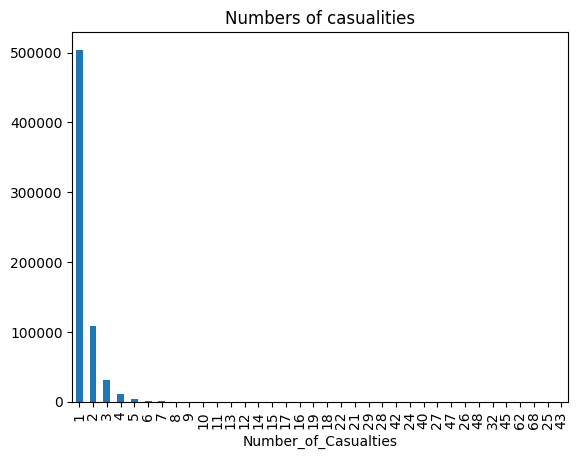

In [48]:
data['Number_of_Casualties'].value_counts().plot(kind="bar")
plt.title("Numbers of casualities")
plt.show()

### 18. Road type with highest accident rate

In [49]:
rt = data['Road_Type'].mode()[0]
rt

'Single carriageway'

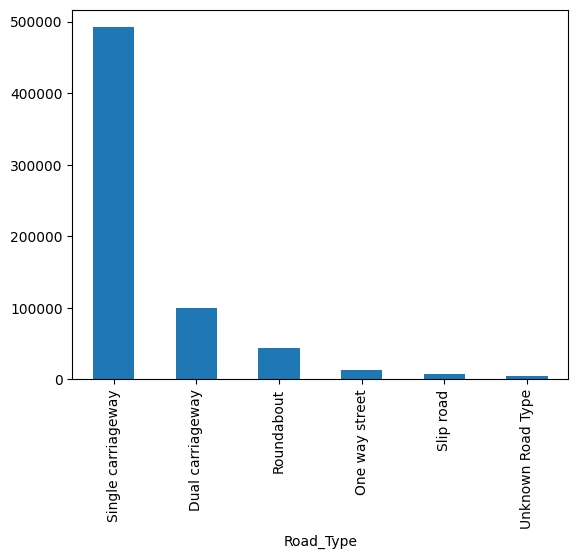

In [50]:
rtype = data['Road_Type'].value_counts()

rtype.plot(kind="bar")
plt.show()

In [51]:
rtc = data[data['Road_Type'] == rt].value_counts().sum()
rtc

np.int64(454085)

In [52]:
percent(rtc)

'74.58%'

### The most common `Road Type` is `Single Carriageway` which has `492143` or `74.49%` of the entire data.

### 19. Is there's any relationship between the Road Type and the Casualty

In [53]:
data.groupby(['Number_of_Casualties', 'Road_Type']).size().unstack()

Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road,Unknown Road Type
Number_of_Casualties,,,,,,
1,69619,11656,35291,378621,5104,3750
2,19685,1451,6419,78510,1343,563
3,6102,303,1555,22306,386,124
4,2350,94,491,8042,122,57
5,941,38,165,2912,50,17
6,388,6,47,1063,17,4
7,159,4,10,355,8,3
8,67,1,5,138,2,1
9,36,2,2,71,1,0


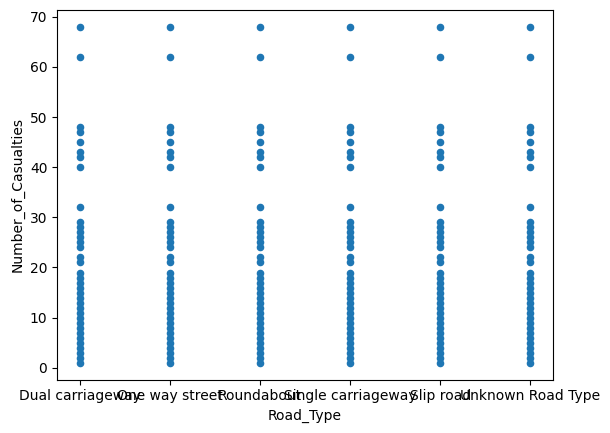

In [54]:
gp_rt = data.groupby(['Number_of_Casualties', 'Road_Type']).size().reset_index()
gp_rt.plot(kind="scatter", x='Road_Type', y='Number_of_Casualties')
plt.show()

### 20. Months with highest accidents in year 2019

In [55]:
month_2019 = data[data['Year'] == 2019]['Month']
month_2019.mode()[0]

'December'

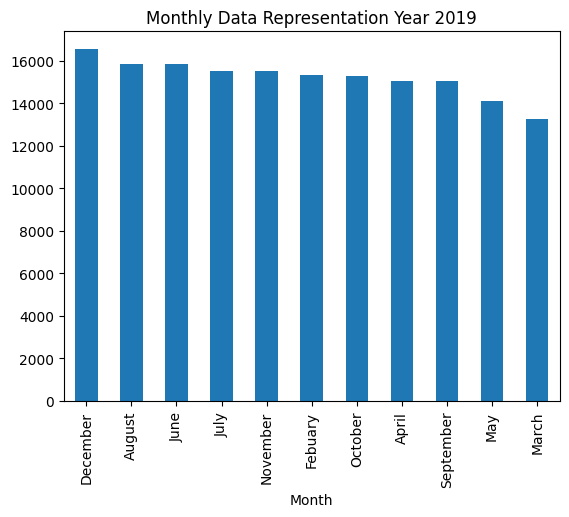

In [56]:
month_2019.value_counts().plot(kind="bar")
plt.title("Monthly Data Representation Year 2019")
plt.show()

### 21. Different threads of montly accident rate from year 2019 to 2024

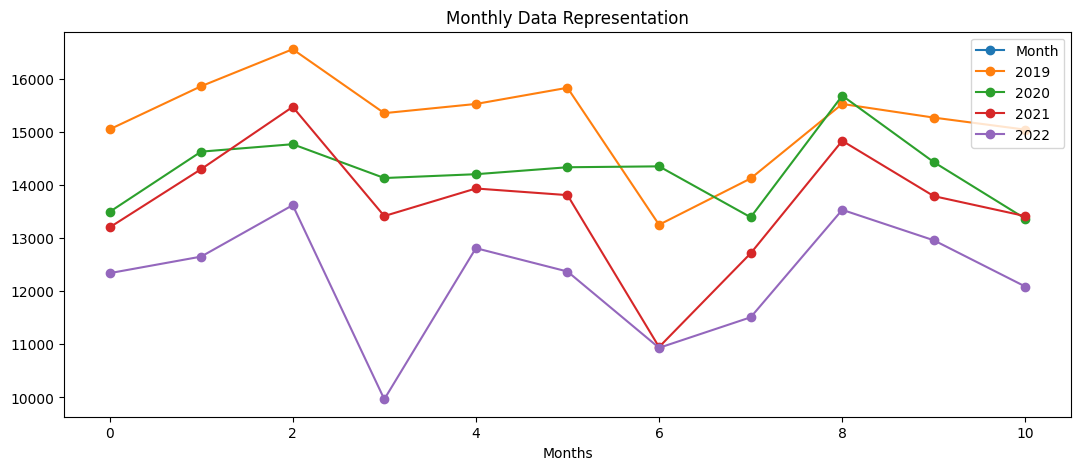

Year,Month,2019,2020,2021,2022
0,NaN,15049,13494,13202,12341
1,NaN,15862,14630,14300,12653
2,NaN,16559,14770,15473,13622
3,NaN,15355,14133,13417,9967
4,NaN,15528,14205,13936,12812
5,NaN,15833,14336,13811,12372
6,NaN,13253,14353,10950,10935
7,NaN,14125,13394,12715,11510
8,NaN,15528,15684,14834,13534
9,NaN,15271,14432,13792,12960


In [63]:

monthly = data.groupby(['Month', 'Year']).size().unstack().reset_index("Month")
monthly['Month'] = monthly['Month'].astype("category")
monthly['Month'] = monthly['Month'].map(months_dict)

monthly.plot(kind="line", marker="o")
# plt.xticks(ticks=_2020['Month'], labels=months)
plt.legend(loc='upper right', fontsize=10)
plt.xlabel("Months")
plt.title("Monthly Data Representation")
plt.gcf().set_size_inches(13, 5)
plt.show()
monthly['Month'].unique()
monthly # ['Month']